In [1]:
import platform
print(platform.python_version())
# The Python version I used is "3.12.3".

3.12.3


In [2]:
from importlib.metadata import version
print(version('pandas')) # pandas 2.2.2
print(version('numpy')) # numpy 1.26.4

2.2.2
1.26.4


In [3]:
import pandas as pd
import numpy as np

# Data Preprocessing

### Load datasets

In [4]:
# Load data
data1 = pd.read_csv("Card Transactions 2014.csv")
data2 = pd.read_csv("Card Transactions 2015-2016.csv")
data3 = pd.read_csv("Card Transactions 2016-2017.csv")

### Explore first and last few rows of data

In [5]:
data1.head()

,Service Area,Account Description,Creditor,Transaction Date,JV Reference,JV Date,JV Value
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93,20/05/2014,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111,20/05/2014,"6,000.00"
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,6,20/05/2014,309.38
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,7,20/05/2014,218.76
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,15/04/2014,381,20/05/2014,306


In [6]:
data1.tail()

,Service Area,Account Description,Creditor,Transaction Date,JV Reference,JV Date,JV Value
4557,Adults and Communities,Postage,WWW.ROYALMAIL.COM,23/02/2015,5002,16/03/2015,124
4558,Children's Family Services,Equipment and Materials Purcha,WWW.SMYTHSTOYS.COM,20/02/2015,5188,16/03/2015,89.96
4559,Children's Family Services,Equipment and Materials Purcha,WWW.TTS-GROUPS.CO.U,06/02/2015,5207,16/03/2015,445.92
4560,Children's Family Services,Books-CDs-Audio-Video,WWW.WILDGOOSE.AC,09/02/2015,5271,16/03/2015,407.44
4561,Children's Family Services,Other Transfer Payments to Soc,www.1st4footballtic,06/02/2015,4895,16/03/2015,153


In [7]:
data2.head()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
0,Assurance,Miscellaneous Expenses,43033820 COSTA COFFEE,18/08/2015,5043.0,2
1,Children's Family Services,Miscellaneous Expenses,99 PLUS DISCOUNT MART,08/06/2015,4184.0,29.97
2,Children's Family Services,E19 - Learning Resources,99P STORES LTD,07/12/2015,6278.0,34.65
3,Children's Family Services,Equipment and Materials Purcha,99P STORES LTD,18/08/2015,5041.0,10.72
4,Children's Family Services,Subsistence,CHOPSTIX00000000000,21/05/2015,5750.0,33.7


In [8]:
data2.tail()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
3860,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,17/11/2015,6042.0,3.5
3861,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,20/01/2016,6751.0,4.5
3862,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,21/03/2016,7535.0,4.5
3863,Children's Family Services,Food Costs,ZAHRA NEWSAGENT,31/03/2016,7639.0,4.5
3864,NaN,NaN,NaN,NaN,NaN,"381,012.77"


In [9]:
data3.head()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
0,Assurance,Travelling Expenses,TICKETOFFICESALE,04/03/2016,7331.0,29.10
1,Assurance,Travelling Expenses,SELFSERVE TICKET,07/03/2016,7342.0,10.00
2,Assurance,Miscellaneous Expenses,BIRMINGHAM CC,22/04/2016,7871.0,69.00
3,Assurance,Miscellaneous Expenses,BIRMINGHAM CC,25/04/2016,7891.0,13.00
4,Assurance,Miscellaneous Expenses,D H C LTD,08/06/2016,8320.0,170.85


In [10]:
data3.tail()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
3954,NaN,NaN,NaN,NaN,NaN,NaN
3955,NaN,NaN,NaN,NaN,NaN,NaN
3956,NaN,NaN,NaN,NaN,NaN,NaN
3957,NaN,NaN,NaN,NaN,NaN,NaN
3958,NaN,NaN,NaN,NaN,NaN,NaN


### Remove redundant rows and column, make column names consistent, and convert data types to the same formats before merging

In [11]:
data2 = data2.iloc[:-1,]
data1.dropna(how='all', inplace=True)
data2.dropna(how='all', inplace=True)
data3.dropna(how='all', inplace=True)

In [12]:
del(data1['JV Date'])
data1.rename(columns = {'Transaction Date':'Journal Date', 'JV Reference':'Journal Reference', 'JV Value':'Total'}, inplace = True)

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4562 entries, 0 to 4561
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Service Area         4562 non-null   object
 1   Account Description  4562 non-null   object
 2   Creditor             4562 non-null   object
 3   Journal Date         4562 non-null   object
 4   Journal Reference    4562 non-null   int64 
 5   Total                4562 non-null   object
dtypes: int64(1), object(5)
memory usage: 214.0+ KB


In [14]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3864 entries, 0 to 3863
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Service Area         3864 non-null   object 
 1   Account Description  3864 non-null   object 
 2   Creditor             3864 non-null   object 
 3   Journal Date         3864 non-null   object 
 4   Journal Reference    3864 non-null   float64
 5   Total                3864 non-null   object 
dtypes: float64(1), object(5)
memory usage: 181.3+ KB


In [15]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1604 entries, 0 to 1603
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Service Area         1604 non-null   object 
 1   Account Description  1604 non-null   object 
 2   Creditor             1604 non-null   object 
 3   Journal Date         1604 non-null   object 
 4   Journal Reference    1604 non-null   float64
 5   Total                1604 non-null   float64
dtypes: float64(2), object(4)
memory usage: 87.7+ KB


In [16]:
data1['Total'] = data1['Total'].str.replace(',', '').astype(float)
data2['Total'] = data2['Total'].str.replace(',', '').astype(float)
data2['Journal Reference'] = data2['Journal Reference'].astype(int)
data3['Journal Reference'] = data3['Journal Reference'].astype(int)

### Merge datasets

In [17]:
# merge data
df = pd.concat([data1, data2, data3])
df.reset_index(inplace=True, drop=True)


In [18]:
# see how the data looks like after the merger
df.head()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
0,Childrens Services,IT Services,123-REG.CO.UK,23/04/2014,93,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,03/04/2014,111,6000.00
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,6,309.38
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,02/04/2014,7,218.76
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,15/04/2014,381,306.00


In [19]:
df.tail()

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
10025,Public Health,Equipment and Materials Purcha,VALUE PRODUCTS LTD,22/06/2016,8486,4.55
10026,Commissioning,Training,THE COACHING ACADEMY,21/04/2016,7844,600.00
10027,Commissioning,Training,THE COACHING ACADEMY,29/06/2016,8565,450.00
10028,Commissioning,Training,THE COACHING ACADEMY,18/08/2016,9144,1500.00
10029,Regional Enterprise,Training,PUBLIC SECTOR CONNECT,19/07/2016,8692,100.00


In [20]:
df.shape

(10030, 6)

In [21]:
# convert journal date to datetime
df['Journal Date'] = pd.to_datetime(df['Journal Date'], dayfirst=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10030 entries, 0 to 10029
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         10030 non-null  object        
 1   Account Description  10030 non-null  object        
 2   Creditor             10030 non-null  object        
 3   Journal Date         10030 non-null  datetime64[ns]
 4   Journal Reference    10030 non-null  int64         
 5   Total                10030 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 470.3+ KB


### Check for data duplication

In [23]:
df.duplicated(keep=False).sum()

840

In [24]:
df[df.duplicated(keep=False)].sort_values(by=['Service Area','Account Description','Creditor','Journal Date','Journal Reference','Total'])

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
2121,Adults and Communities,Equipment and Materials Purcha,Amazon EU,2014-10-06,3369,60.00
2541,Adults and Communities,Equipment and Materials Purcha,Amazon EU,2014-10-06,3369,60.00
2125,Adults and Communities,Equipment and Materials Purcha,Amazon EU,2014-10-08,3370,110.00
2545,Adults and Communities,Equipment and Materials Purcha,Amazon EU,2014-10-08,3370,110.00
2124,Adults and Communities,Equipment and Materials Purcha,Amazon EU,2014-10-10,3371,53.56
...,...,...,...,...,...,...
2849,Street Scene,Travelling Expenses,UK PARKING CONTROL,2014-10-06,3108,61.50
2329,Street Scene,Vehicle Running Costs,POST OFFICE COUNTER,2014-10-29,3506,287.50
2749,Street Scene,Vehicle Running Costs,POST OFFICE COUNTER,2014-10-29,3506,287.50
2328,Street Scene,Vehicle Running Costs,POST OFFICE COUNTER,2014-10-29,3507,400.00


### There are duplicated rows in the data. Need to inquire the audit client why the data provided has these duplicated rows. Assuming that clean and legit data should have no duplicated rows, let's remove duplicated rows.

In [26]:
df.drop_duplicates(keep='first', inplace=True)

In [27]:
df.duplicated(keep=False).sum()

0

### Check for duplicated journal references

In [28]:
# Check for duplicated journal references after all-column duplication rows are removed.
df['Journal Reference'].value_counts()

Journal Reference
5213    5
5829    5
5721    4
7015    4
4829    4
       ..
3326    1
3325    1
3327    1
3332    1
8692    1
Name: count, Length: 7867, dtype: int64

In [29]:
df[df['Journal Reference']==5213]

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
4332,Children's Family Services,Travelling Expenses,OYSTER AUTOTOPUP,2015-02-16,5213,20.00
5491,Children's Family Services,Cleaning and domestic material,ASDA SUPERSTORE,2015-09-03,5213,5.00
5525,Children's Family Services,Equipment and Materials Purcha,ASDA SUPERSTORE,2015-09-03,5213,35.50
5554,Children's Family Services,Food Costs,ASDA SUPERSTORE,2015-09-03,5213,84.95
5617,Children's Family Services,Other Transfer Payments to Soc,ASDA SUPERSTORE,2015-09-03,5213,8.00


In [30]:
df[df['Journal Reference']==5829]

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
5490,Children's Family Services,Cleaning and domestic material,ASDA SUPERSTORE,2015-11-02,5829,3.60
5522,Children's Family Services,Equipment and Materials Purcha,ASDA SUPERSTORE,2015-11-02,5829,3.50
5552,Children's Family Services,Food Costs,ASDA SUPERSTORE,2015-11-02,5829,3.94
5625,Children's Family Services,Publications,ASDA SUPERSTORE,2015-11-02,5829,0.60
6276,Children's Family Services,Travelling Expenses,OYSTER AUTOTOPUP000,2015-05-21,5829,20.00


In [31]:
df[df.duplicated(subset=['Journal Reference'], keep=False)].sort_values(by=['Journal Reference','Journal Date','Service Area','Account Description','Creditor','Total'])

,Service Area,Account Description,Creditor,Journal Date,Journal Reference,Total
7261,Children's Family Services,Cleaning and domestic material,SAINSBURYS TO YOU 0567,2015-05-11,3084,28.30
7285,Children's Family Services,Food Costs,SAINSBURYS TO YOU 0567,2015-05-11,3084,59.41
2120,Street Scene,Equipment and Materials Purcha,Amazon EU,2014-10-03,3107,123.29
6319,Children's Education & Skills,Food Costs,KAYS DELICATESSEN,2015-05-13,3107,405.48
2429,Street Scene,Travelling Expenses,UK PARKING CONTROL,2014-10-06,3108,61.50
...,...,...,...,...,...,...
9039,Children's Family Services,Food Costs,SAINSBURYS TO YOU 0567,2016-08-23,9196,93.85
9048,Children's Family Services,Cleaning and domestic material,SAINSBURYS TO YOU 0567,2016-08-30,9299,16.70
9049,Children's Family Services,Food Costs,SAINSBURYS TO YOU 0567,2016-08-30,9299,186.14
9325,Children's Family Services,Cleaning and domestic material,ASDA HOME SHOPPING,2016-08-31,9304,11.00


### There can be multiple credit card transactions per journal reference. However, why do some journal references have different journal dates? Need to inquire the audit client for more understanding.

In [32]:
df.rename(columns = {'Account Description':'Acc Name','Total':'Amount'}, inplace=True)
df.reset_index(inplace=True, drop=True)

The data has been preprocessed and now ready for EDA. Stayed tuned for the next parts.

In [33]:
df.describe()

,Journal Date,Journal Reference,Amount
count,9610,9610.000000,9610.000000
mean,2015-06-04 12:02:05.868886784,4785.660978,100.649040
min,2014-04-02 00:00:00,1.000000,-4707.000000
25%,2014-10-29 00:00:00,3240.250000,10.000000
50%,2015-06-15 00:00:00,4874.500000,25.575000
75%,2016-01-11 00:00:00,6620.750000,90.000000
max,2016-09-02 00:00:00,9328.000000,15340.800000
std,NaN,2432.306253,411.469209


In [34]:
# Extract quarter and year
df['Year'] = df['Journal Date'].dt.year
df['Quarter'] = df['Journal Date'].dt.to_period('Q')

In [35]:
df.head()

,Service Area,Acc Name,Creditor,Journal Date,Journal Reference,Amount,Year,Quarter
0,Childrens Services,IT Services,123-REG.CO.UK,2014-04-23,93,143.81,2014,2014Q2
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,2014-04-03,111,6000.00,2014,2014Q2
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,2014-04-02,6,309.38,2014,2014Q2
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,2014-04-02,7,218.76,2014,2014Q2
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,2014-04-15,381,306.00,2014,2014Q2


In [36]:
df.tail()

,Service Area,Acc Name,Creditor,Journal Date,Journal Reference,Amount,Year,Quarter
9605,Public Health,Equipment and Materials Purcha,VALUE PRODUCTS LTD,2016-06-22,8486,4.55,2016,2016Q2
9606,Commissioning,Training,THE COACHING ACADEMY,2016-04-21,7844,600.00,2016,2016Q2
9607,Commissioning,Training,THE COACHING ACADEMY,2016-06-29,8565,450.00,2016,2016Q2
9608,Commissioning,Training,THE COACHING ACADEMY,2016-08-18,9144,1500.00,2016,2016Q3
9609,Regional Enterprise,Training,PUBLIC SECTOR CONNECT,2016-07-19,8692,100.00,2016,2016Q3


In [37]:
df['Service Area'].value_counts()

Service Area
Children's Family Services        5318
Childrens Services                1297
Family Services                    770
Children's Education & Skills      642
Commissioning                      258
Streetscene                        257
Assurance                          246
Children's Service DSG             231
Adults and Communities             155
Deputy Chief Operating Officer     113
Customer Support Group              96
Education                           95
Street Scene                        39
CSG Managed Budget                  36
Internal Audit & CAFT               11
Commercial                           9
Control Accounts                     8
Governance                           8
Parking & Infrastructure             5
Regional Enterprise                  5
Corporate Accounting                 4
NSCSO                                3
Public Health                        3
Strategic Commissioning Board        1
Name: count, dtype: int64

In [38]:
df['Acc Name'].value_counts()

Acc Name
Equipment and Materials Purcha    2075
Food Costs                        1792
Travelling Expenses                923
Other Transfer Payments to Soc     564
Other Services                     538
                                  ... 
Fixtures and fittings                1
Gas                                  1
Employer's National Insurance        1
Operating Leases - Transport         1
Advertising for staff                1
Name: count, Length: 64, dtype: int64

In [39]:
df['Acc Name'].nunique()

64

In [40]:
tran_threshold = df['Acc Name'].value_counts().values >= 30

In [41]:
len(df['Acc Name'].value_counts()[tran_threshold])

28

In [42]:
df['Acc Name'].value_counts()[tran_threshold]

Acc Name
Equipment and Materials Purcha    2075
Food Costs                        1792
Travelling Expenses                923
Other Transfer Payments to Soc     564
Other Services                     538
Cleaning and domestic material     537
Miscellaneous Expenses             428
Books-CDs-Audio-Video              393
Building Repairs & Maintenance     380
Stationery                         225
Training                           174
Vehicle Running Costs              164
Private Contractors - Third Pa     145
Postage                            119
Publications                       118
Legal and Court Fees               117
Subsistence                         90
Subscriptions                       89
Telephones Calls                    80
Other Agencies - Third Party P      57
General Office Expenses             56
Education CFR Administrative S      46
E25 - Catering Supplies             46
E19 - Learning Resources            46
Consumable Catering Supplies        46
Other Indirect E

In [43]:
df['Creditor'].value_counts()

Creditor
AMAZON UK MARKETPLACE    521
ASDA SUPERSTORE          430
ASDA HOME SHOPPING       324
Amazon Mktplce EU-U      254
OYSTER BUS AUTOTOP       226
                        ... 
GREATCAKEWA                1
HERTS FOR LEARNING         1
JD SPORTS PLC 293          1
MOORCROFT GROUP            1
PUBLIC SECTOR CONNECT      1
Name: count, Length: 1605, dtype: int64

In [44]:
df['Creditor'].nunique()

1605

In [45]:
tran_threshold = df['Creditor'].value_counts().values >= 30

In [46]:
len(df['Creditor'].value_counts()[tran_threshold])

51

In [47]:
df['Creditor'].value_counts()[tran_threshold]

Creditor
AMAZON UK MARKETPLACE     521
ASDA SUPERSTORE           430
ASDA HOME SHOPPING        324
Amazon Mktplce EU-U       254
OYSTER BUS AUTOTOP        226
SAINSBURYS S/MKT          215
SAINSBURYS 0513           209
AMAZON EU                 172
WWW.FLEETMINICABS.C       143
JS ONLINE GROCERY         141
TESCO STORE 2296          122
WWW.FLEETMINICABS.COM     117
Amazon EU                 113
WWW.DVLA.GOV.UK           106
Amazon Svcs EuropeS       104
OYSTER AUTOTOPUP          100
TESCO STORES 6440         100
AMAZON SVCS EUROPE,SAR     95
ARGOS RETAIL GROUP         92
B Q                        89
HMCOURTS-SERVICE.G         80
SAINSBURYS TO YOU 0567     78
SAINSBURYS S/MKTS          77
SAINSBURYS TO YOU 0637     71
ARGOS LTD                  67
TESCO STORES 2296          66
TP WINCHMORE HILL          61
TESCO STORES 644           60
B  Q                       59
TFL CC/LEZ CHARGE          59
POST OFFICE COUNTER        56
GOOGLE Supercell           56
KAYS DELICATESSEN          54
G

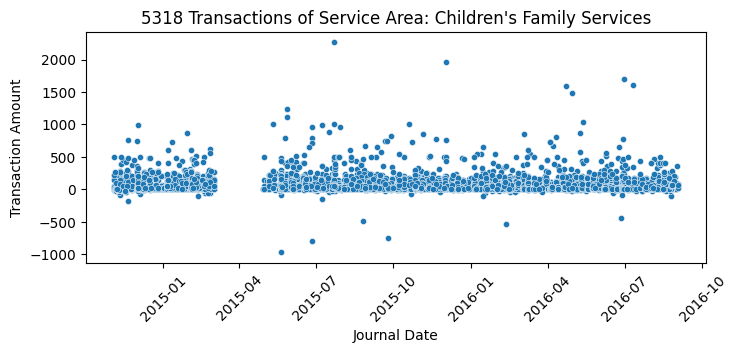

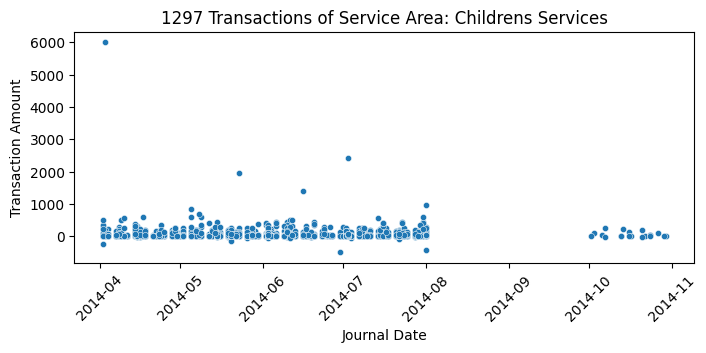

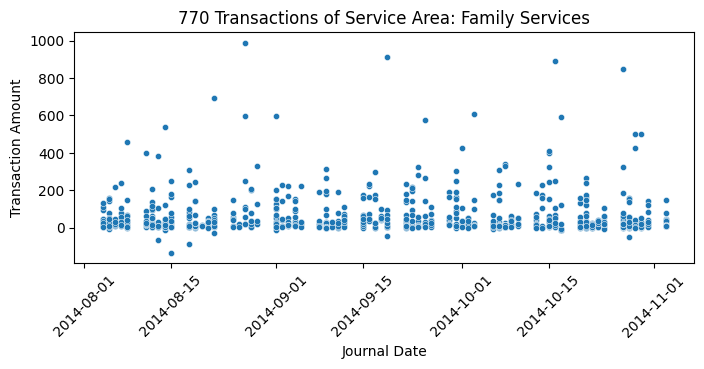

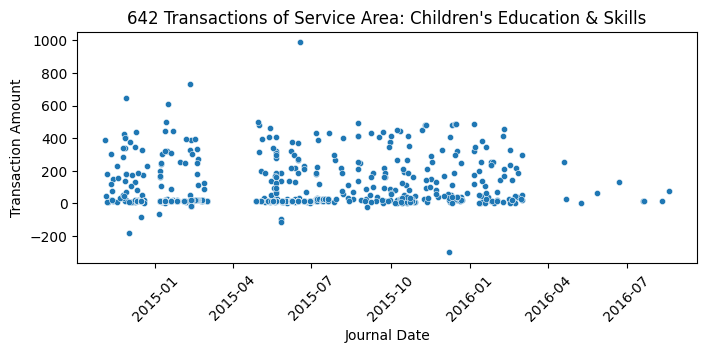

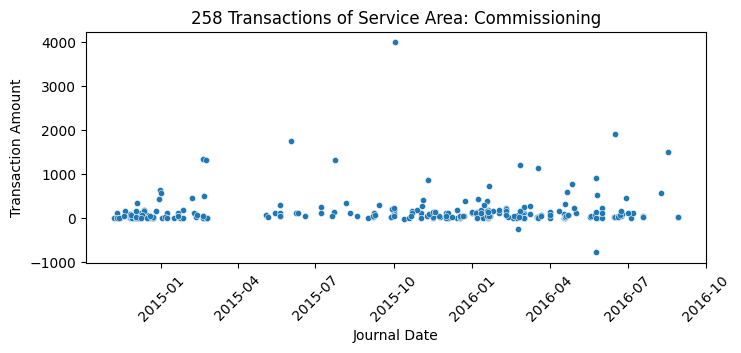

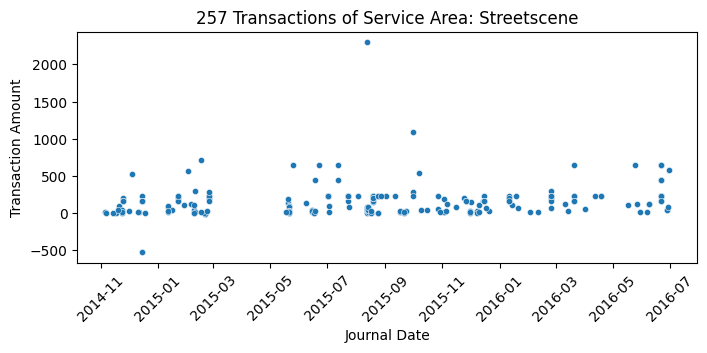

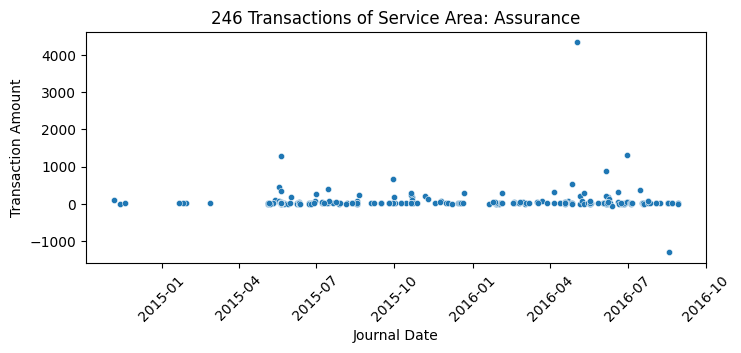

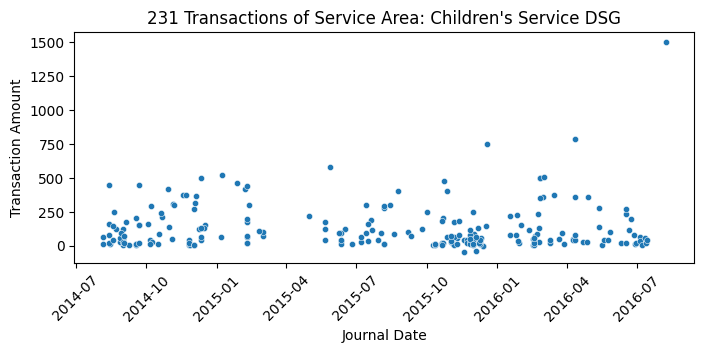

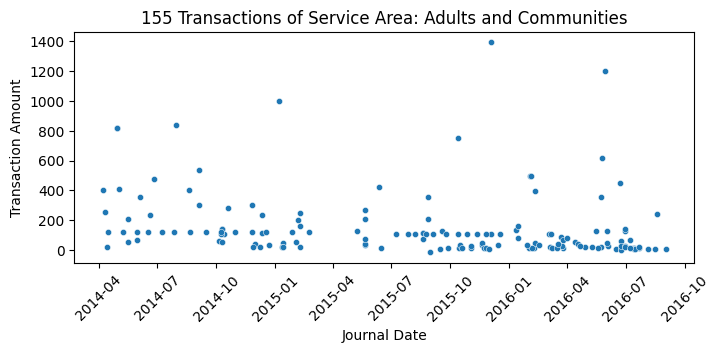

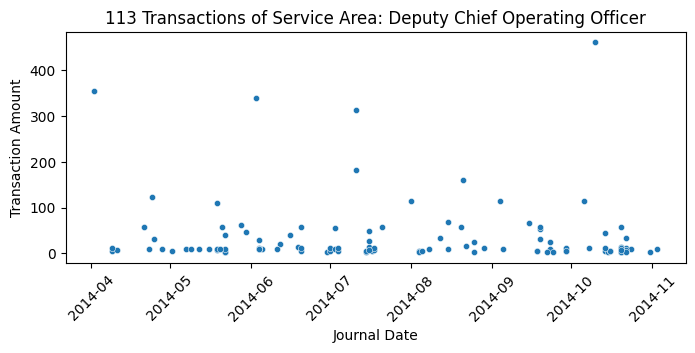

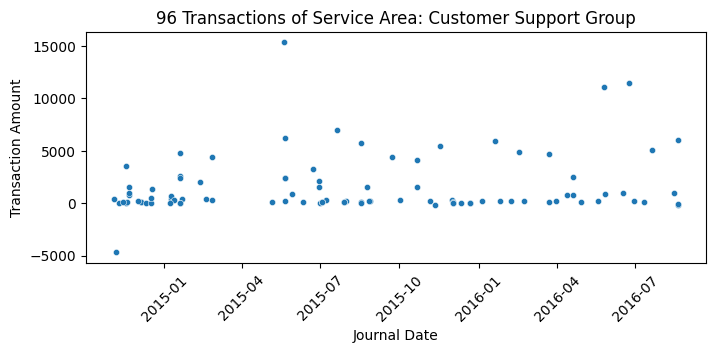

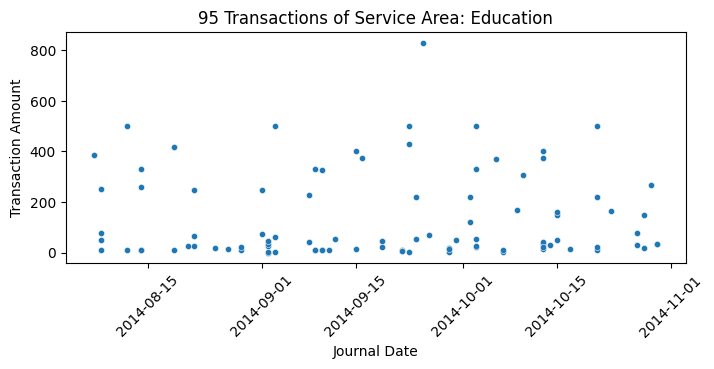

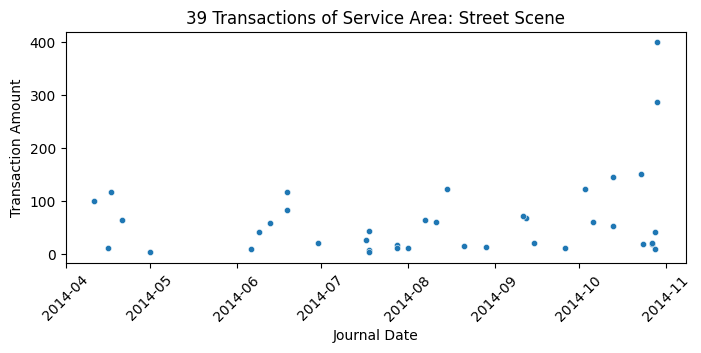

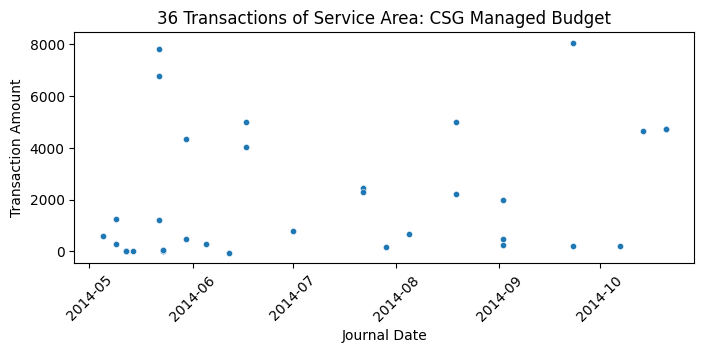

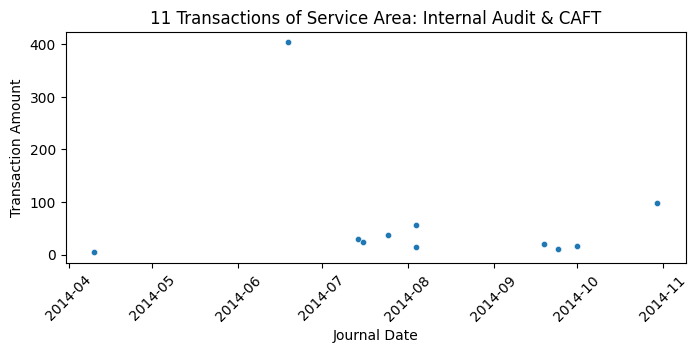

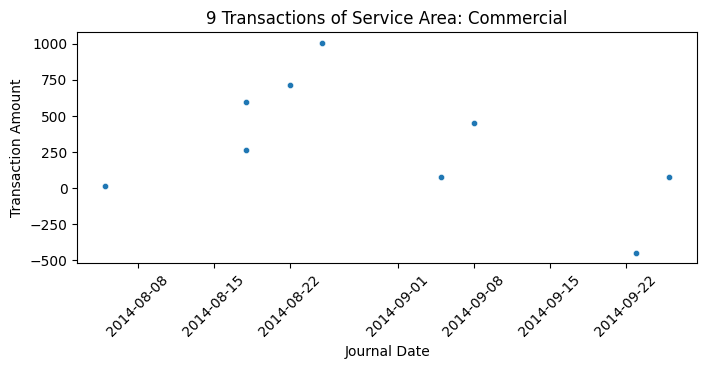

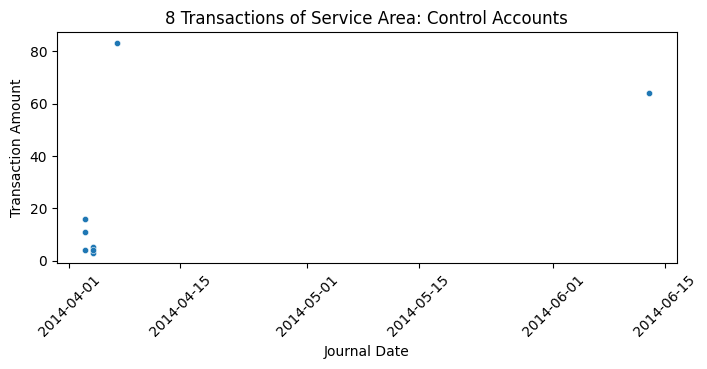

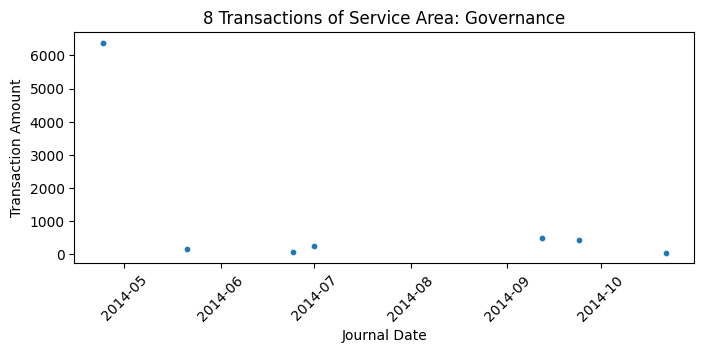

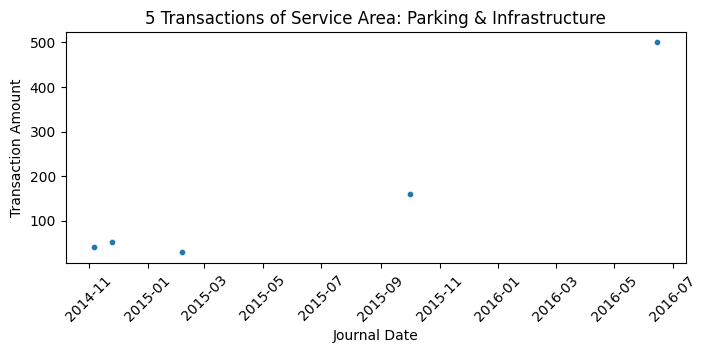

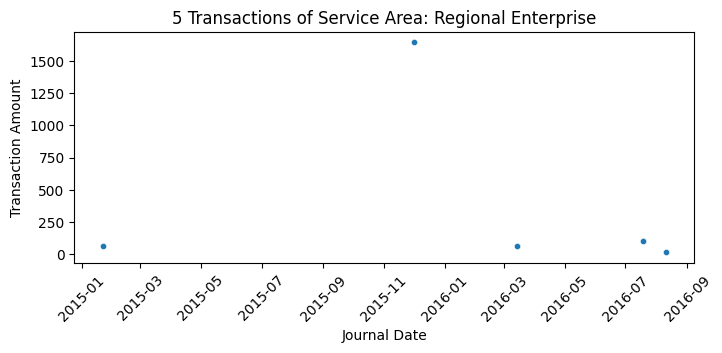

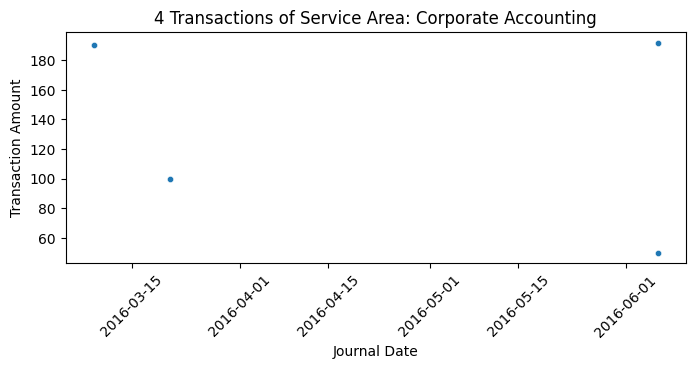

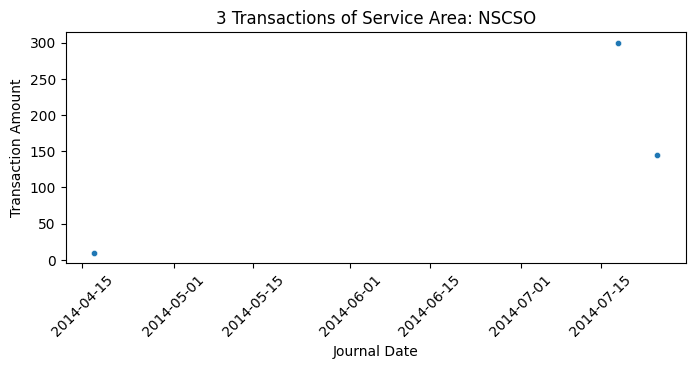

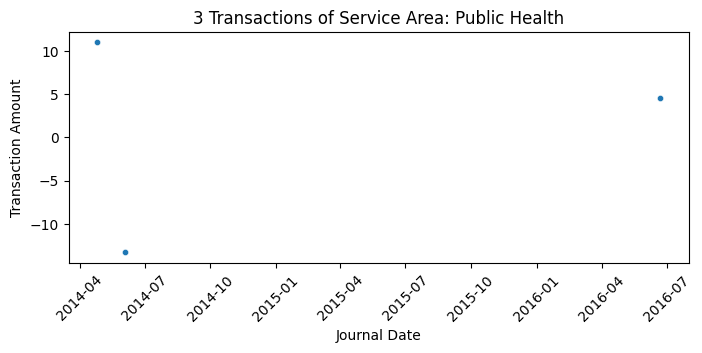

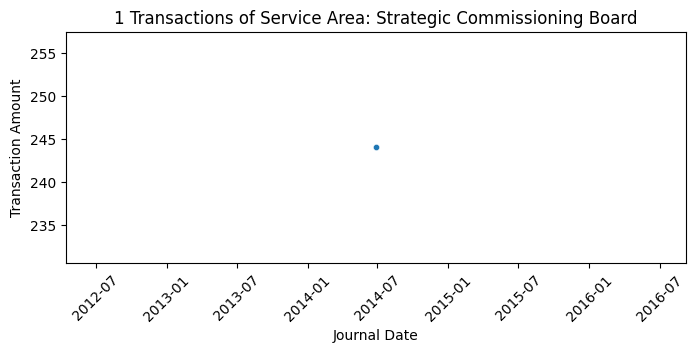

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

for service_area in df['Service Area'].value_counts().index.to_list():
    plt.figure(figsize=(8, 3))
    sns.scatterplot(data=df[df['Service Area']==service_area], x='Journal Date', y='Amount', s=20)
    plt.xlabel('Journal Date')
    plt.ylabel('Transaction Amount')
    plt.title(f'{len(df[df['Service Area']==service_area])} Transactions of Service Area: {service_area}')
    plt.xticks(rotation=45)
    plt.show()
    

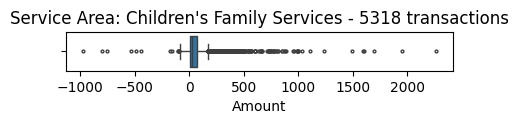

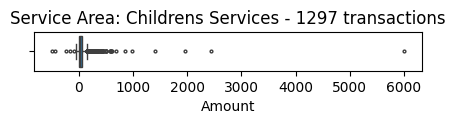

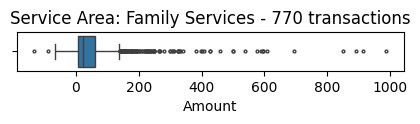

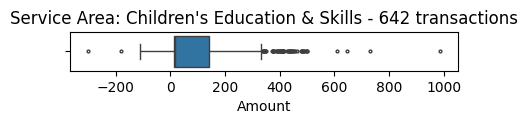

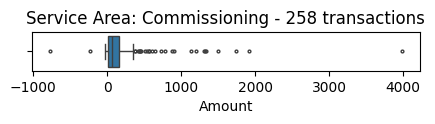

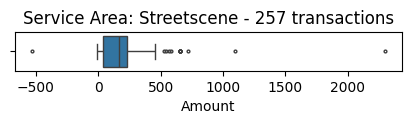

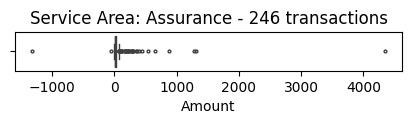

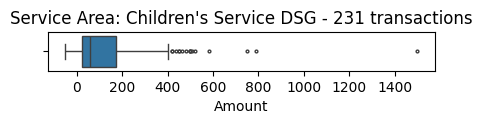

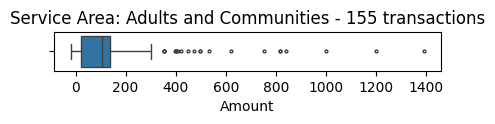

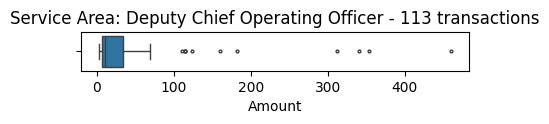

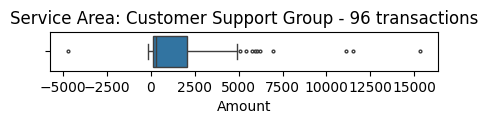

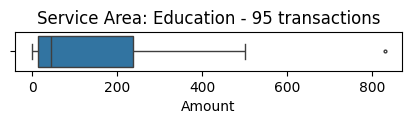

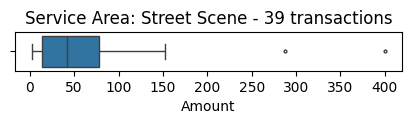

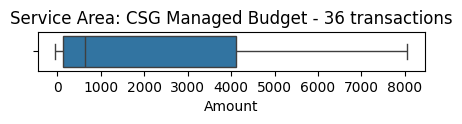

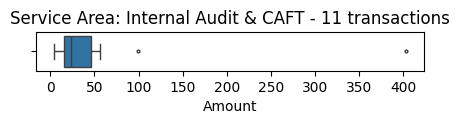

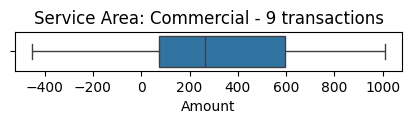

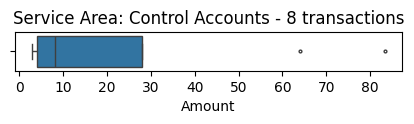

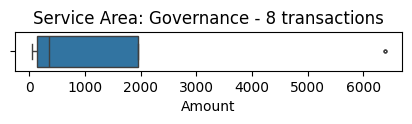

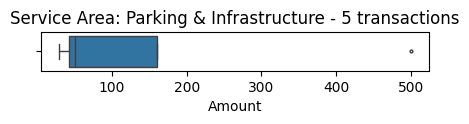

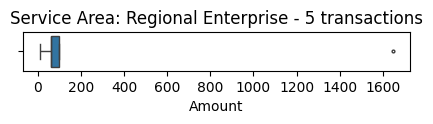

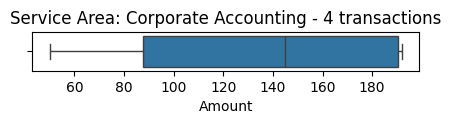

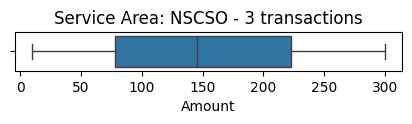

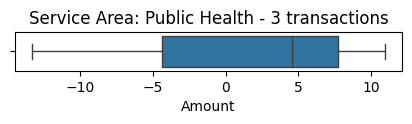

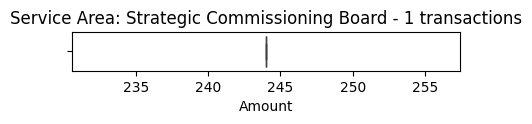

In [49]:
for service_area in df['Service Area'].value_counts().index.to_list():
    plt.figure(figsize=(5, 0.5))
    sns.boxplot(data=df[df['Service Area']==service_area]['Amount'], orient='h', fliersize=2)
    plt.title(f'Service Area: {service_area} - {len(df[df['Service Area']==service_area])} transactions')
    plt.show()

### Exploring data distributions via histogram and KDE

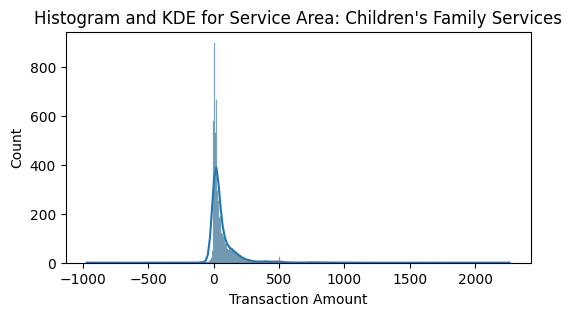

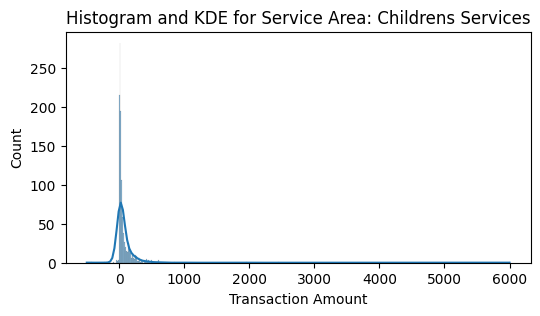

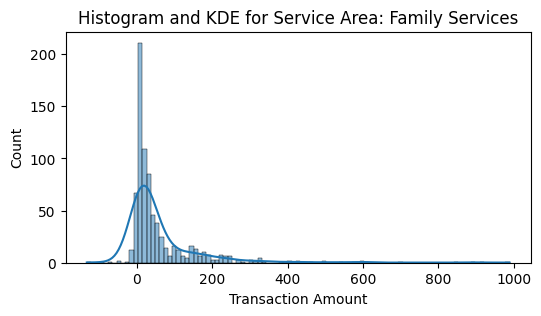

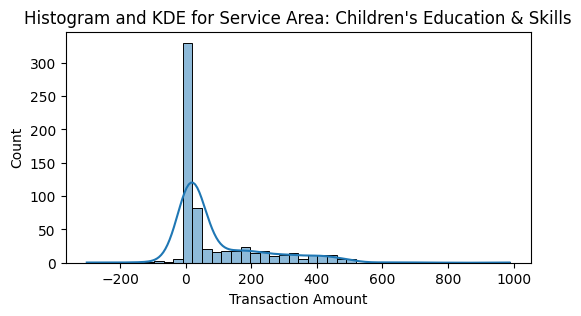

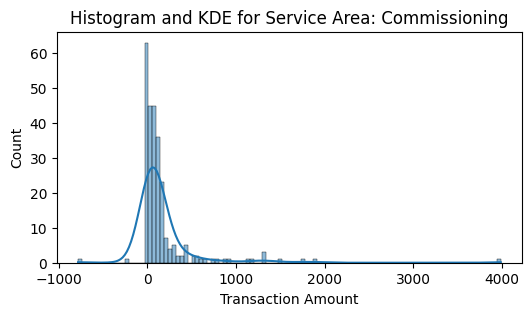

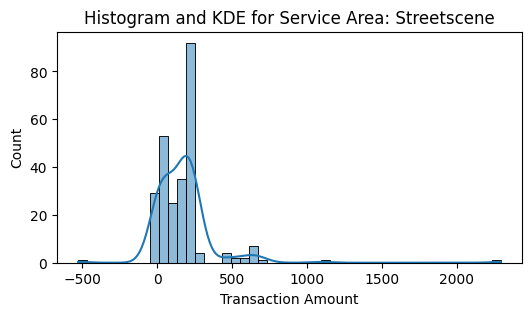

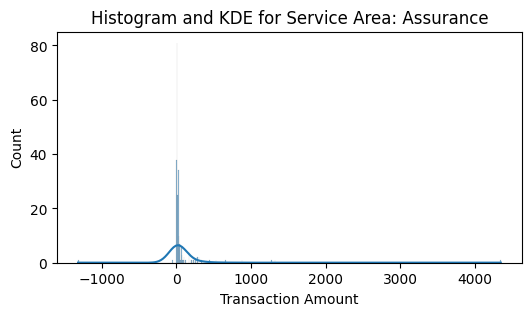

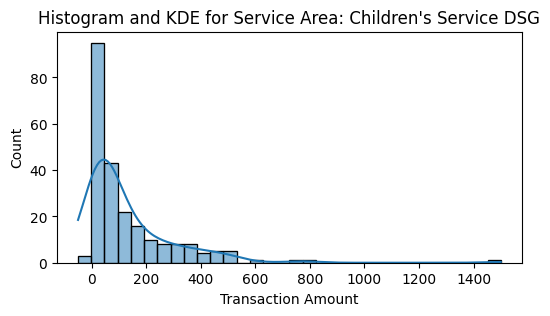

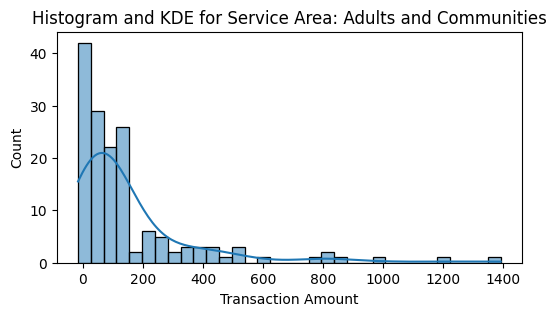

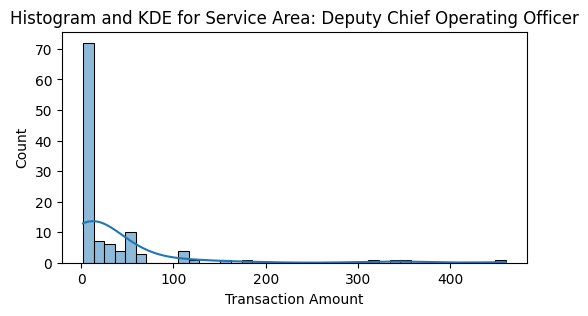

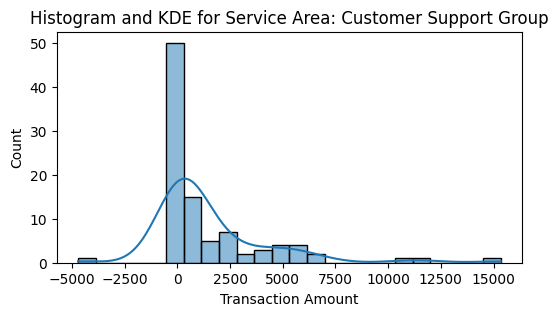

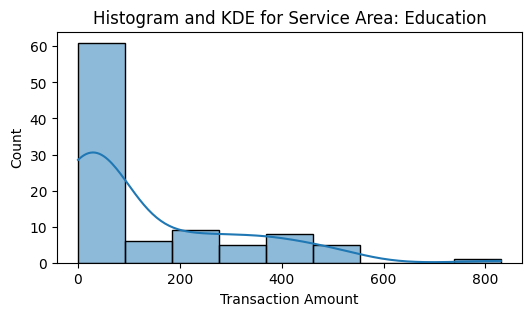

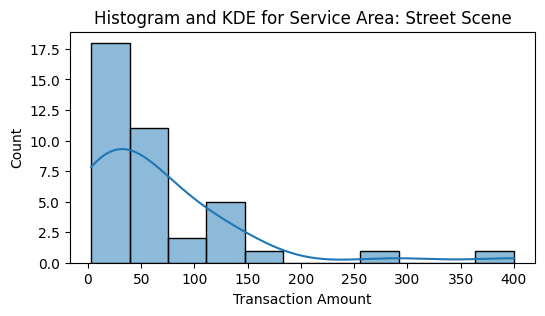

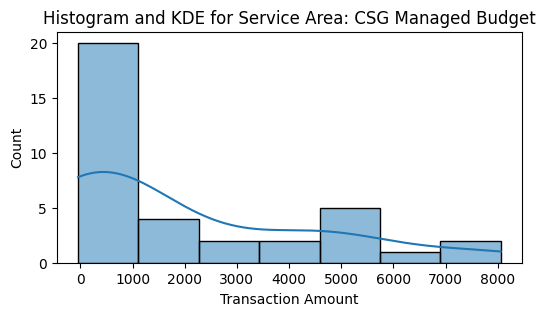

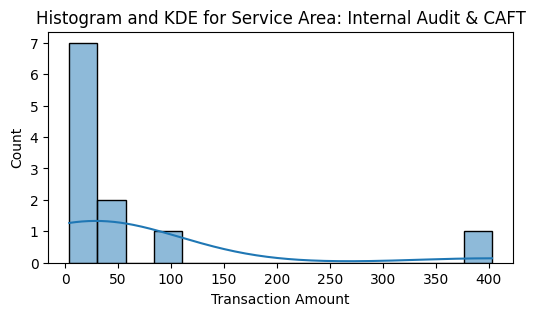

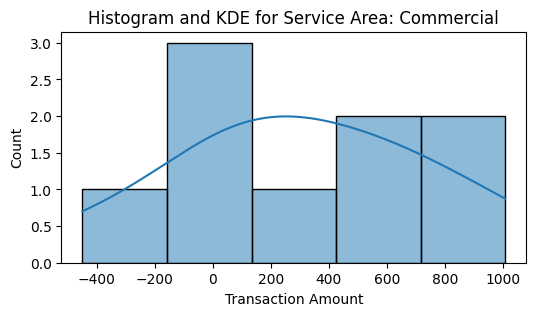

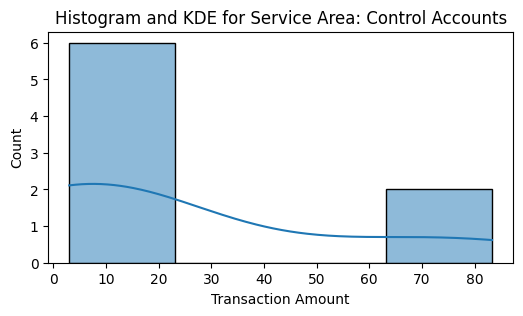

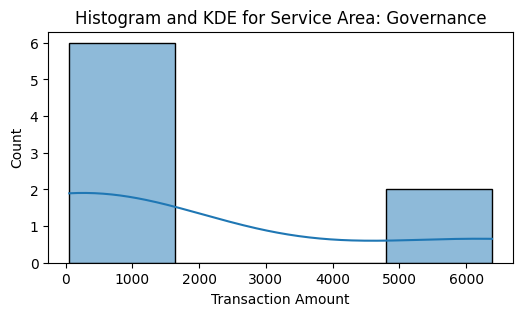

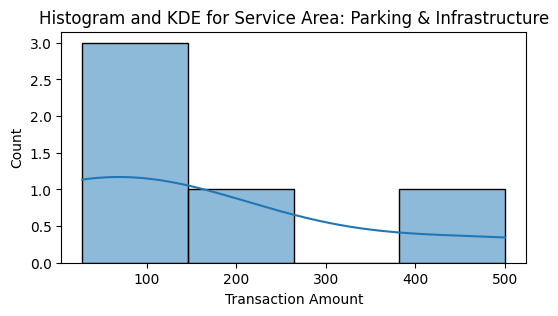

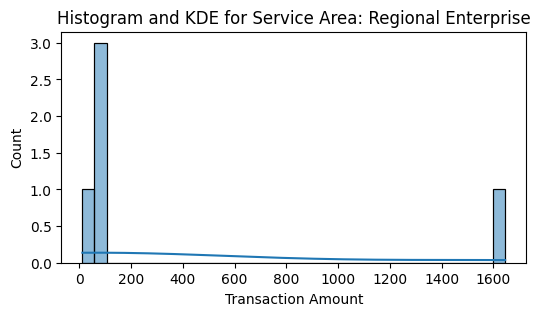

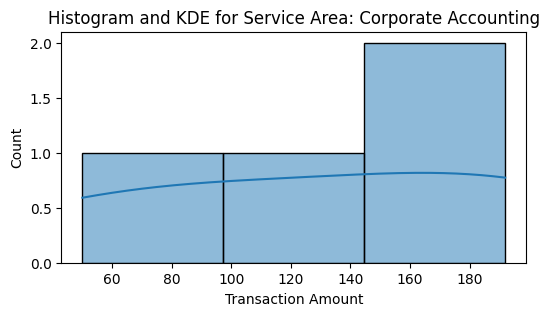

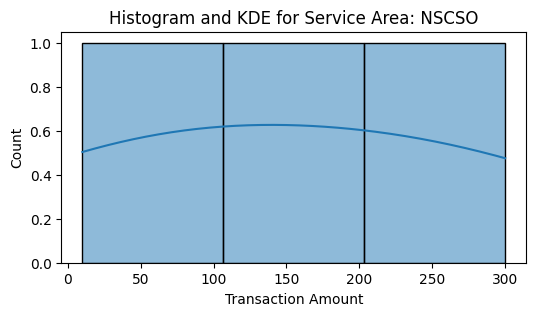

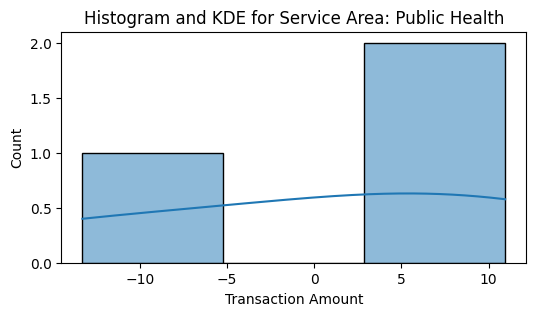

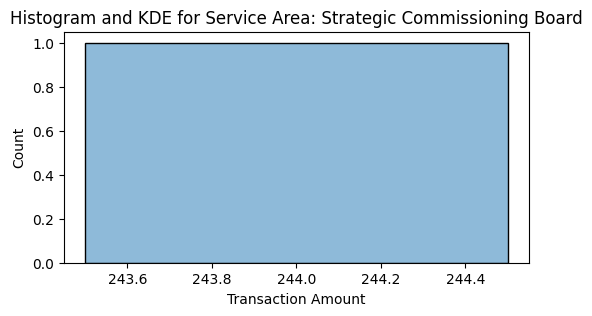

In [50]:
for service_area in df['Service Area'].value_counts().index.to_list():
    plt.figure(figsize=(6, 3))
    sns.histplot(data=df[df['Service Area']==service_area]['Amount'], kde=True, kde_kws={'bw_method': 'silverman'})
    plt.title(f'Histogram and KDE for Service Area: {service_area}')
    plt.xlabel('Transaction Amount')
    plt.show()

In [51]:
import warnings
warnings.filterwarnings("ignore")

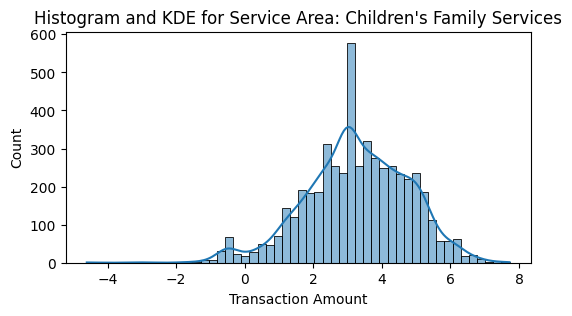

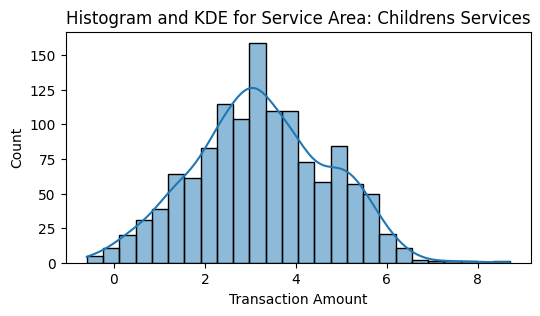

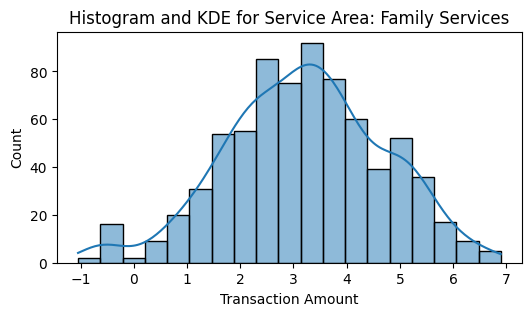

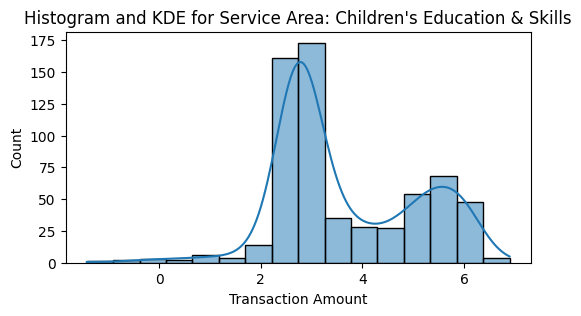

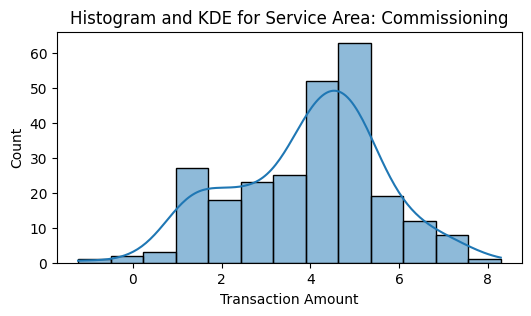

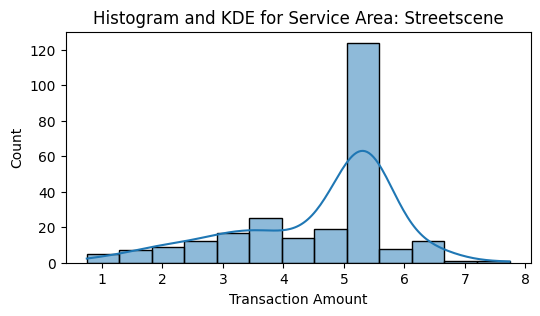

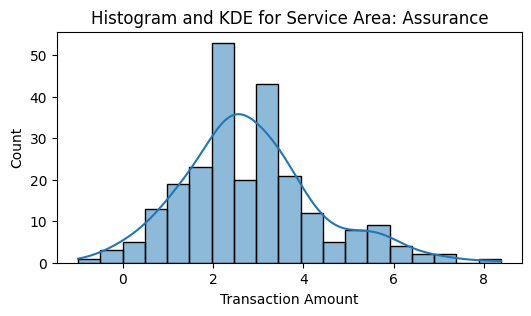

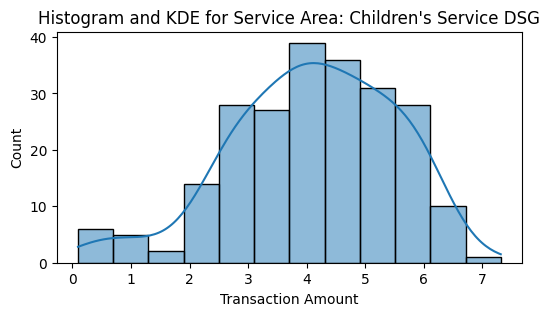

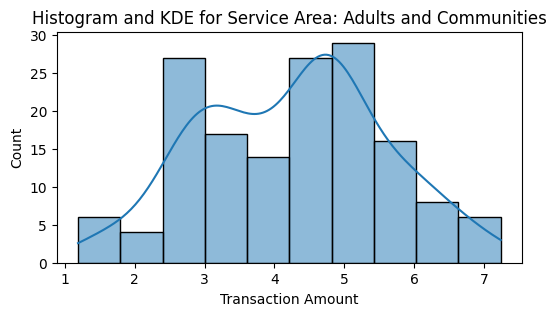

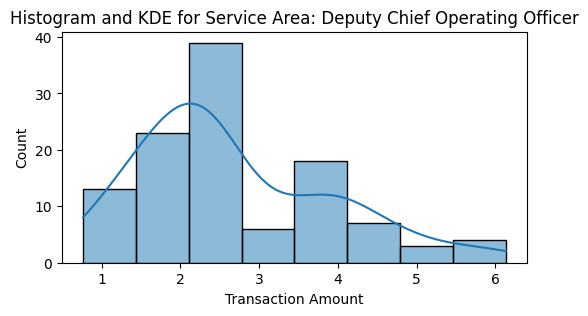

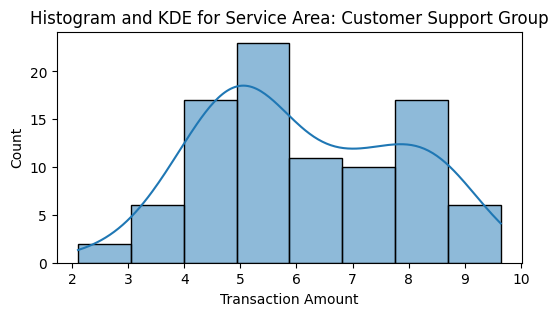

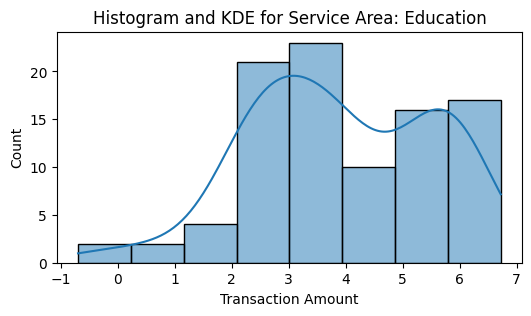

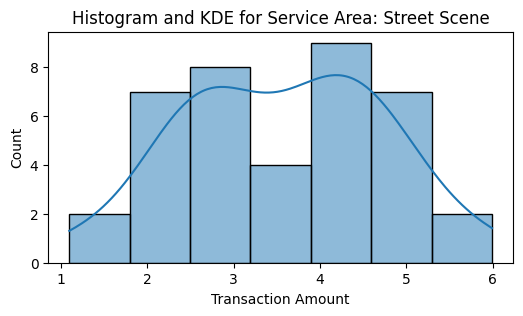

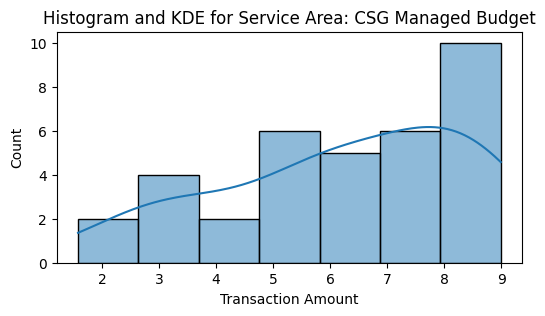

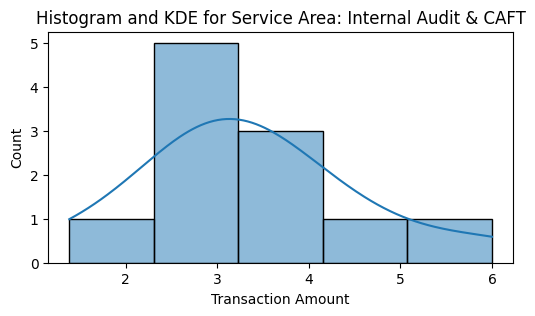

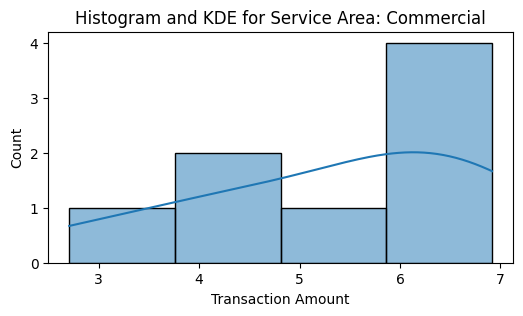

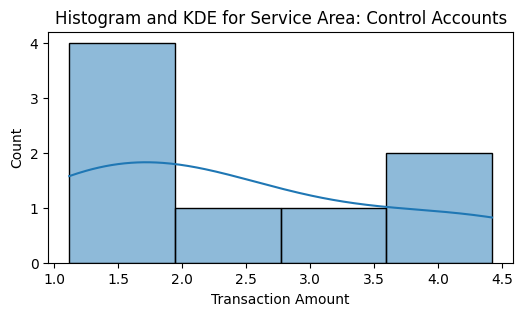

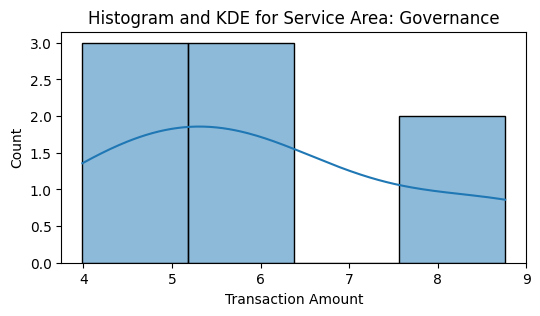

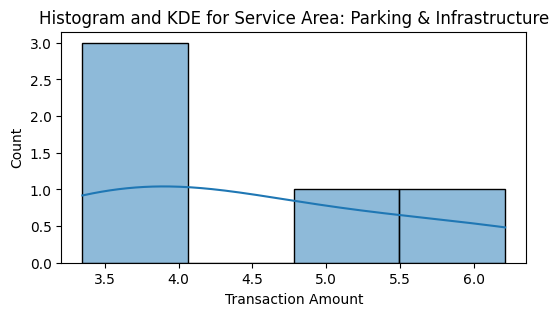

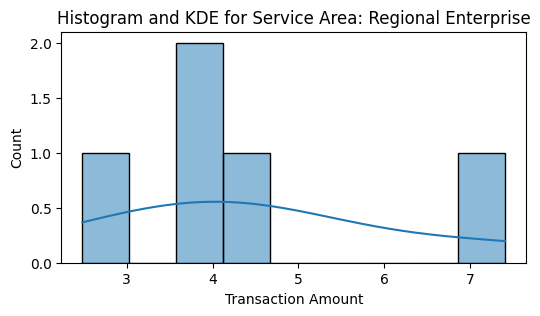

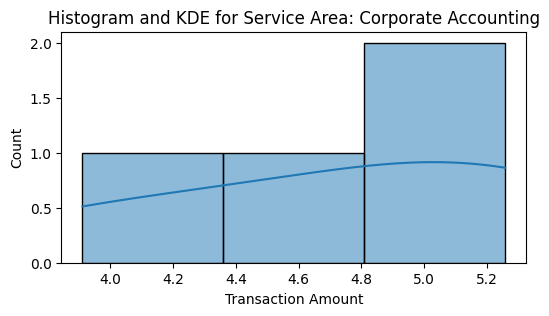

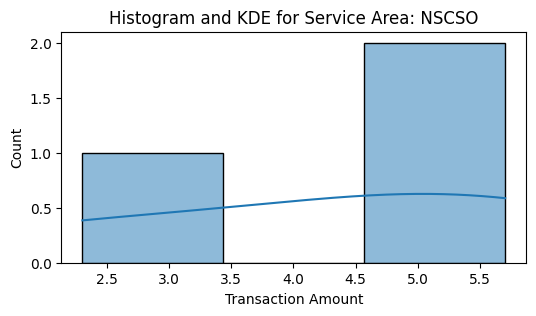

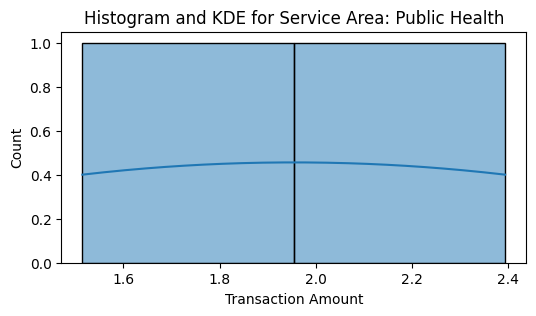

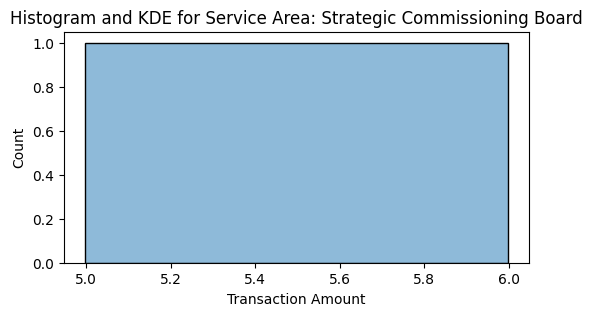

In [52]:
for service_area in df['Service Area'].value_counts().index.to_list():
    plt.figure(figsize=(6, 3))
    sns.histplot(data=np.log(df[df['Service Area']==service_area]['Amount']), kde=True, kde_kws={'bw_method': 'silverman'})
    plt.title(f'Histogram and KDE for Service Area: {service_area}')
    plt.xlabel('Transaction Amount')
    plt.show()

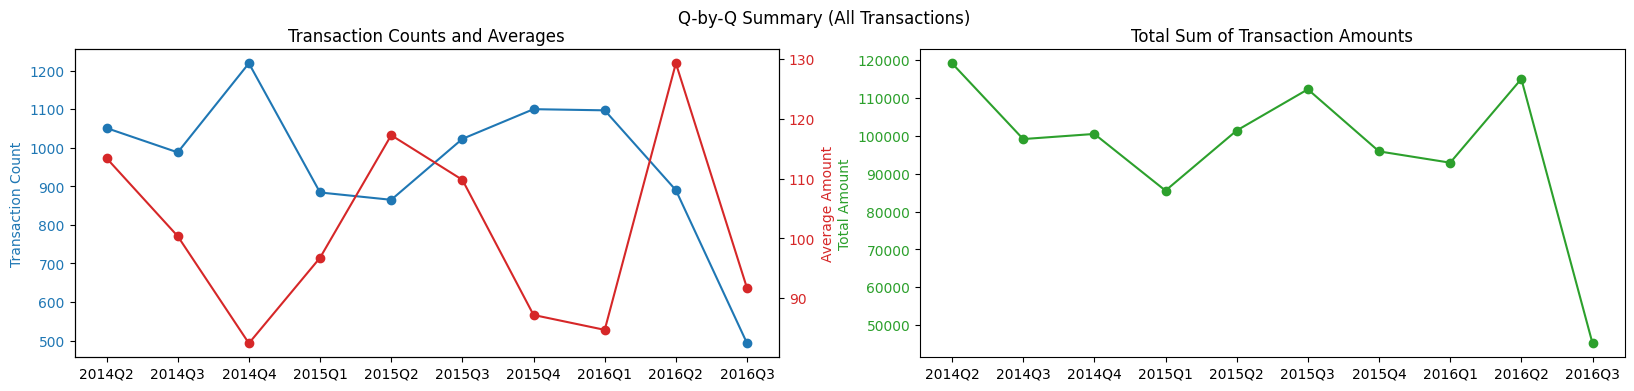

In [53]:
summary0 = df.groupby(['Quarter']).agg(
    transaction_count=('Amount', 'count'),
    total_amount=('Amount', 'sum'),
    average_amount=('Amount', 'mean')
).reset_index()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 4))
    
# Left plot: Transaction counts and averages
ax1.set_ylabel('Transaction Count', color='tab:blue')
ax1.plot(summary0['Quarter'].astype(str), summary0['transaction_count'], marker='o', color='tab:blue', label='Transaction Count')
ax1.tick_params(axis='y', labelcolor='tab:blue')
    
ax3 = ax1.twinx()
ax3.set_ylabel('Average Amount', color='tab:red')
ax3.plot(summary0['Quarter'].astype(str), summary0['average_amount'], marker='o', color='tab:red', label='Average Amount')
ax3.tick_params(axis='y', labelcolor='tab:red')
    
# Right plot: Total transaction amounts
ax2.set_ylabel('Total Amount', color='tab:green')
ax2.plot(summary0['Quarter'].astype(str), summary0['total_amount'], marker='o', color='tab:green', label='Total Amount')
ax2.tick_params(axis='y', labelcolor='tab:green')
    
# Setting titles and legends
ax1.set_title('Transaction Counts and Averages')
ax2.set_title('Total Sum of Transaction Amounts')
fig.suptitle('Q-by-Q Summary (All Transactions)', fontsize=12)

plt.show()

In [54]:
df[df['Quarter']=='2016Q3']['Journal Date'].dt.month.value_counts()

Journal Date
8    260
7    219
9     14
Name: count, dtype: int64

#### Needs to inquire why transaction counts are so low in Q3 2016 and why September 2016 had too few transactions.

In [55]:
df[df['Quarter']=='2016Q2']['Journal Date'].dt.month.value_counts()

Journal Date
6    368
4    265
5    257
Name: count, dtype: int64

In [56]:
df[df['Quarter']=='2014Q2']['Journal Date'].dt.month.value_counts()

Journal Date
5    432
4    326
6    293
Name: count, dtype: int64